In [7]:
#https://www.nature.com/articles/s41586-022-04817-8#data-availability
#read h5ad file

import scanpy as sc

# Replace 'path_to_your_file.h5ad' with the actual path to your h5ad file
adata = sc.read_h5ad('data/heart/human_dcm_hcm_scportal_03.17.2022.h5ad')

total_data=adata.X.toarray()

In [8]:
#read meta data  data/heart/DCM_HCM_MetaData_V1.txt

import pandas as pd

meta_data=pd.read_csv('data/heart/DCM_HCM_MetaData_V1.txt',sep='\t')
meta_data

#remve the first row
meta_data=meta_data.iloc[1:,:]

#set index from 0
meta_data.index=range(len(meta_data))

meta_data

/tmp/ipykernel_61521/400083674.py:5: DtypeWarning: Columns (8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data=pd.read_csv('data/heart/DCM_HCM_MetaData_V1.txt',sep='\t')


,NAME,biosample_id,donor_id,cell_type,cell_type__ontology_label,sex,cell_type_leiden06,sub_cluster,n_umi,n_genes,...,entropy,doublet_score,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label
0,TTCTTCCGTTCAACGT-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-X1,15815.0,4632,...,7.503471227832365,0.0918918918918919,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
1,CATCCACCATCTAACG-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,15546.0,4673,...,7.582058261621526,0.10172744721689062,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
2,ACCCAAACAGCTAACT-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,14983.0,4432,...,7.466404841161381,0.0896184560780834,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
3,AAGGAATCAACTGGTT-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-X1,14995.0,4483,...,7.452265652814673,0.071875,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
4,TACCCGTAGCGTGCTC-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,14797.0,4690,...,7.6090815967688155,0.06373626373626375,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592684,TTATTGCGTCGGTGTC-1-79,LV_1561_2_nf,P1561,CL_0010008,cardiac endothelial cell,male,02.Endothelial_I,EC-Lymphatic,403.0,291,...,6.691553,0.038961,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
592685,GTCACGGGTTGTATGC-1-79,LV_1561_2_nf,P1561,CL_0010008,cardiac endothelial cell,male,02.Endothelial_I,EC-PKD1L1,494.0,349,...,6.791491,0.032258,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
592686,GTCATGATCTTTCGAT-1-79,LV_1561_2_nf,P1561,CL_0010008,cardiac endothelial cell,male,02.Endothelial_I,EC-Lymphatic,502.0,404,...,7.409244,0.012023,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
592687,GCGATCGTCAGAGTGG-1-79,LV_1561_2_nf,P1561,CL_0010008,cardiac endothelial cell,male,02.Endothelial_I,EC-Lymphatic,423.0,343,...,7.284163,0.009591,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3


In [9]:
#fiter meta data, keeps cell_type__ontology_label == "cardiac muscle cell"

meta_data=meta_data[meta_data['cell_type__ontology_label']=='cardiac muscle cell']
meta_data


#filte meta data, keeps disease__ontology_label	 == "normal" or "hypertrophic cardiomyopathy" or "dilated cardiomyopathy"

meta_data=meta_data[meta_data['disease__ontology_label'].isin(['normal','hypertrophic cardiomyopathy','dilated cardiomyopathy'])]
meta_data

,NAME,biosample_id,donor_id,cell_type,cell_type__ontology_label,sex,cell_type_leiden06,sub_cluster,n_umi,n_genes,...,entropy,doublet_score,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label
0,TTCTTCCGTTCAACGT-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-X1,15815.0,4632,...,7.503471227832365,0.0918918918918919,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
1,CATCCACCATCTAACG-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,15546.0,4673,...,7.582058261621526,0.10172744721689062,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
2,ACCCAAACAGCTAACT-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,14983.0,4432,...,7.466404841161381,0.0896184560780834,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
3,AAGGAATCAACTGGTT-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-X1,14995.0,4483,...,7.452265652814673,0.071875,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
4,TACCCGTAGCGTGCTC-1-0,LV_1622_2_nf,P1622,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,14797.0,4690,...,7.6090815967688155,0.06373626373626375,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592523,CCTTGTGTCGTGCAGC-1-79,LV_1561_2_nf,P1561,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,1042.0,708,...,7.319635,0.062837,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
592543,TAAGTCGGTCAGACGA-1-79,LV_1561_2_nf,P1561,CL_0000746,cardiac muscle cell,male,00.Cardiomyocyte_I,CM-HHATL,967.0,621,...,7.003412,0.105455,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
592548,GTTGTAGAGACGCTCC-1-79,LV_1561_2_nf,P1561,CL_0000746,cardiac muscle cell,male,12.Cardiomyocyte_II,CM-HHATL,973.0,609,...,6.82258,0.084746,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3
592560,GTGAGTTGTCTGTGAT-1-79,LV_1561_2_nf,P1561,CL_0000746,cardiac muscle cell,male,12.Cardiomyocyte_II,CM-HHATL,949.0,546,...,6.731055,0.031229,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0002084,heart left ventricle,EFO_0009922,10x 3' v3


In [10]:
normal=meta_data[meta_data['disease__ontology_label'].isin(['normal'])]

set(normal["donor_id"].to_list())

{'P1515',
 'P1516',
 'P1539',
 'P1540',
 'P1547',
 'P1549',
 'P1558',
 'P1561',
 'P1582',
 'P1600',
 'P1603',
 'P1610',
 'P1622',
 'P1678',
 'P1702',
 'P1718'}

In [14]:
hypertrophic=meta_data[meta_data['disease__ontology_label'].isin(['hypertrophic cardiomyopathy'])]

set(hypertrophic["donor_id"].to_list())

{'P1422',
 'P1425',
 'P1447',
 'P1462',
 'P1479',
 'P1508',
 'P1510',
 'P1602',
 'P1630',
 'P1631',
 'P1685',
 'P1707',
 'P1722',
 'P1726',
 'P1735'}

In [15]:
dilated=meta_data[meta_data['disease__ontology_label'].isin(['dilated cardiomyopathy'])]

set(dilated["donor_id"].to_list())

{'P1290',
 'P1300',
 'P1304',
 'P1358',
 'P1371',
 'P1430',
 'P1437',
 'P1472',
 'P1504',
 'P1606',
 'P1617'}

In [16]:
meta_data_train=meta_data[meta_data['donor_id'].isin(['P1515', 'P1516', 'P1539', 'P1540', 'P1547', 'P1549', 'P1558', 'P1561', 'P1582', 'P1600', 'P1603', 'P1610', 'P1622',
                                                      'P1422', 'P1425', 'P1447', 'P1462', 'P1479', 'P1508', 'P1510', 'P1602', 'P1630', 'P1631', 'P1685', 'P1707',
                                                      'P1290', 'P1300', 'P1304', 'P1358', 'P1371', 'P1430', 'P1437', 'P1472', 'P1504','P1606', 'P1617'])]

meta_data_test=meta_data[meta_data['donor_id'].isin([ 'P1678', 'P1702', 'P1718',
                                                      'P1722', 'P1726', 'P1735',
                                                      'P1472', 'P1504'])]





In [17]:
#filte total_data according to meta_data index   train

train_data=total_data[meta_data_train.index,:]

gene_ids=adata.var.index.tolist()

#filted data to dataframe
train_data=pd.DataFrame(train_data,columns=gene_ids)

labels=meta_data_train['disease__ontology_label'].tolist()

train_data.index=labels

In [18]:
#filte total_data according to meta_data index   test

test_data=total_data[meta_data_test.index,:]

gene_ids=adata.var.index.tolist()

#filted data to dataframe
test_data=pd.DataFrame(test_data,columns=gene_ids)

labels=meta_data_test['disease__ontology_label'].tolist()

test_data.index=labels

In [19]:
adata=0

In [20]:



#statistics of cells expressing each gene
gene_expressed_cell_number=train_data.astype(bool).sum(axis=0)

print(len(gene_expressed_cell_number))
#filter gene expressed in less than 10 cells
gene_expressed_cell_number=gene_expressed_cell_number[gene_expressed_cell_number>30000]
print(len(gene_expressed_cell_number))

data_rm_sparse_train=train_data[gene_expressed_cell_number.index.tolist()]
data_rm_sparse_train.shape  

data_rm_sparse_test=test_data[gene_expressed_cell_number.index.tolist()]

36601
3840


In [21]:
data_rm_sparse_train.columns=data_rm_sparse_train.columns.astype(str)
data_rm_sparse_test.columns=data_rm_sparse_test.columns.astype(str)

In [22]:
import numpy as np

row_sums = data_rm_sparse_train.sum(axis=1)

data_rm_sparse_train = data_rm_sparse_train.div(row_sums, axis=0)*1e4
data_rm_sparse_train=np.log1p(data_rm_sparse_train)

row_sums = data_rm_sparse_test.sum(axis=1)

data_rm_sparse_test = data_rm_sparse_test.div(row_sums, axis=0)*1e4
data_rm_sparse_test=np.log1p(data_rm_sparse_test)

In [23]:
data_rm_sparse_test.max().max()

7.921624406240338

In [24]:
import pickle
#generate gene_to_TF_transform_matrix
import numpy as np

TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#data_rm_sparse=pickle.load(open("data/zheng68k/data_rm_sparse.dataframe","rb"))

gene_number=len(gene_expressed_cell_number.index.tolist())    #6033

TF_number=len(TF_gene_dict)

gene_to_TF_transform_matrix=np.zeros((gene_number,TF_number))

TF_list=TF_gene_dict.keys()
for i,gene in enumerate(data_rm_sparse_train.columns):
    try:
        j=TF_list.index("gene")
        gene_to_TF_transform_matrix[i][j]=1
    except:
        pass
        
gene_to_TF_transform_matrix

pickle.dump(gene_to_TF_transform_matrix,open("data/heart/gene_to_TF_transform_matrix","wb"))

In [25]:
#generate TF_mask

import numpy as np

gene_TF_dict=pickle.load(open("human/gene_TF_dict","rb"))

gene_number = len(gene_expressed_cell_number.index.tolist())    #6033
TF_number = len(TF_gene_dict)

TF_mask = np.zeros((gene_number,TF_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse_train.columns):

    for j,TF in enumerate(TF_gene_dict):
        if TF in gene_TF_dict.get(gene_id,[]):
            TF_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)
print(TF_mask)

pickle.dump(TF_mask,open("data/heart/TF_mask","wb"))

3124339
[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
#generate GO_mask

GO_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0] == "!":
            continue
        
        gene_id=line.split("\t")[2]
        GO_term=line.split("\t")[4]
        if GO_term not in GO_dict:
            GO_dict[GO_term]=[]
        GO_dict[GO_term].append(gene_id)


GO_list=[]
count=0
for item in GO_dict:
    if len(GO_dict[item])>=30:
        count+=1
        GO_list.append(item)
print(count)


gene_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0]=="!":
            continue
        gene_id=line.split("\t")[2].upper()
        GO_term=line.split("\t")[4]
        if gene_id not in gene_dict:
            gene_dict[gene_id]=[]
        gene_dict[gene_id].append(GO_term)



gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
GO_number=len(GO_list)  

GO_mask=np.zeros((gene_number,GO_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse_train.columns):

    for j,GO_term in enumerate(GO_list):
        if GO_term in gene_dict.get(gene_id,"GO:default"):

            GO_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)

pickle.dump(GO_mask,open("data/heart/GO_mask","wb"))


1946
7426098


In [27]:
#generate GO_TF_mask

TF_number=len(TF_gene_dict)
GO_number=len(GO_list) 

GO_TF_mask=np.zeros((TF_number,GO_number))
error_count=0

for i,TF in enumerate(TF_gene_dict):
    for j,GO in enumerate(GO_list):
        if GO in gene_dict.get(TF,"GO:default"):
            GO_TF_mask[i][j]=1
        else:
            error_count+=1
print(error_count)
        
GO_TF_mask

pickle.dump(GO_TF_mask,open("data/heart/GO_TF_mask","wb"))

2332169


In [28]:
#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse_train
###############################################################
gene_to_TF_transform_matrix=pickle.load(open("data/heart/gene_to_TF_transform_matrix","rb"))
TF_mask=pickle.load(open("data/heart/TF_mask","rb"))
GO_mask=pickle.load(open("data/heart/GO_mask","rb"))
GO_TF_mask=pickle.load(open("data/heart/GO_TF_mask","rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in data_rm_sparse.index:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(gene_expressed_cell_number.index.tolist())    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
        
        
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))


#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3

model = GO_Net(input_size, output_size,ratio=[0,0,0])

#reconstraction_model=Reconstraction(len(classes),len(data_rm_sparse.columns))


"""
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

x = torch.randn(10, input_size)
y = torch.randn(10, output_size)

for i in range(epochs):
    optimizer.zero_grad()
    output = model(x)

    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
"""
# define loss function and optimizer

optimizer = optim.Adam(model.parameters(), lr=0.001)
#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



x_train=data_rm_sparse.to_numpy()
y_train=data_rm_sparse.index.to_list()

x_test=data_rm_sparse_test.to_numpy()
y_test=data_rm_sparse_test.index.to_list()
#x_train,x_test,y_train,y_test,train_barcodes,test_barcodes = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),data_annotation["CellName"],test_size=0.2,random_state=1, shuffle=True)


#x_train=x_train[0:400]
#y_train=y_train[0:400]

#label_dict={25:0,26:1,27:2,33:3,34:4}
y_train_relabeled=[label_dict[label] for label in y_train]
y_test_relabeled=[label_dict[label] for label in y_test]


#train_size=20000

#x_train=x_train[0:train_size]
#y_train_relabeled=y_train_relabeled[0:train_size]

train_data=MyDataset(x_train,y_train_relabeled)
train_loader=DataLoader(train_data, batch_size=100, shuffle=True)

num_epochs=50
# 训练模型
for epoch in range(num_epochs):
    running_loss = 0.0
    #reconstraction_running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        #print(labels)
        inputs=Variable(inputs).to(torch.float32)
        labels=Variable(labels).to(torch.long)
        # 将梯度缓存清零
        optimizer.zero_grad()

        # 前向传播、计算损失和反向传播
        outputs,_,_,_ = model(inputs)

        loss = criterion(outputs, labels)


        #reconstraction
        

        #reconstraction_input=reconstraction_model(outputs)
        #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

        #reconstraction_optimizer.zero_grad()

        #combined_loss=loss+reconstraction_loss
        #combined_loss.backward()
        loss.backward()
    
        optimizer.step()
        #reconstraction_optimizer.step()


        #reconstraction_running_loss += reconstraction_loss.item()
        running_loss += loss.item()

        if i % 40 == 0:
            pass
            #print(i)
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
        
        if i%400==0:
            pass

            test_data=MyDataset(x_test,y_test_relabeled)
            test_loader=DataLoader(test_data, batch_size=200, shuffle=True)
            results=[]
            labels=[]
            for i, data in enumerate(test_loader):
                inputs, label = data
                
                inputs=Variable(inputs).to(torch.float32)

                label=Variable(label).to(torch.long)
                 
                outputs,_,_,_ = model(inputs)
                pred = list(torch.max(outputs, 1)[1].numpy())
                results.extend(pred)
                labels.extend(label)
                #print(pred,labels)
                if i>100:
                    break
            accuracy = accuracy_score(labels,results)
                
                    #########
            print(epoch," accuracy:\t",accuracy," loss:\t",running_loss / len(train_loader)," \treconstraction_loss:\t",0)
    
    #save model
    #pickle.dump(model,open("model/GO_heart.model","wb"))
    
    


0  accuracy:	 0.46637254901960784  loss:	 0.0008147595897980189  	reconstraction_loss:	 0
0  accuracy:	 0.8613235294117647  loss:	 0.07321256327301882  	reconstraction_loss:	 0
0  accuracy:	 0.8936274509803922  loss:	 0.11134400341565823  	reconstraction_loss:	 0
0  accuracy:	 0.7873529411764706  loss:	 0.14509915573334525  	reconstraction_loss:	 0
1  accuracy:	 0.8147058823529412  loss:	 7.459344977971707e-05  	reconstraction_loss:	 0
1  accuracy:	 0.7961274509803922  loss:	 0.022304253122086694  	reconstraction_loss:	 0
1  accuracy:	 0.8292156862745098  loss:	 0.042861293147398206  	reconstraction_loss:	 0
1  accuracy:	 0.8999019607843137  loss:	 0.06358171046817902  	reconstraction_loss:	 0
2  accuracy:	 0.9139705882352941  loss:	 2.7717110488110552e-05  	reconstraction_loss:	 0
2  accuracy:	 0.8221078431372549  loss:	 0.008795204551307379  	reconstraction_loss:	 0
2  accuracy:	 0.8506862745098039  loss:	 0.019376696466633397  	reconstraction_loss:	 0
2  accuracy:	 0.902941176470588

KeyboardInterrupt: 

In [29]:
#save model

pickle.dump(model,open("model/GO_heart.model","wb"))

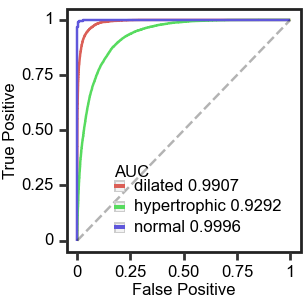

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.52 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_ROC.pdf


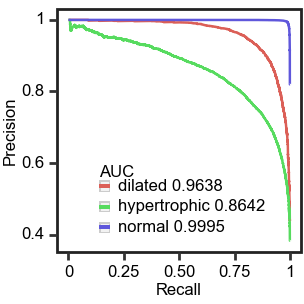

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.52 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_PR.pdf


In [30]:
#ROC and PR curve, multi-class

from plotnine import *
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn.preprocessing import OneHotEncoder



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"






#set font to arial
theme_set(theme_bw(base_family='Arial'))

fprs,tprs,precisions,recalls,roc,pr=[],[],[],[],[],[]


#predict test data
test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=40000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
        
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
        
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)

    y_prob=outputs.detach().numpy()
    y_test=list(labels.numpy())
    break

#convert y_test to one-hot
enc = OneHotEncoder()
enc.fit(np.array(y_test).reshape(-1,1))
y_test=enc.transform(np.array(y_test).reshape(-1,1)).toarray()
y_test=np.array(y_test)

#calculate OvR ROC and PR curve
n_classes = y_prob.shape[1]  # Number of classes
types=['normal', 'hypertrophic', 'dilated']


for i in range(n_classes):
    fpr, tpr, threshold = roc_curve(y_test[:, i], y_prob[:, i])
    precision,recall,threshold = precision_recall_curve(y_test[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)
    fprs.extend(fpr)
    tprs.extend(tpr)
    precisions.extend(precision)
    recalls.extend(recall)
    roc.extend(["%s %.4f" %(types[i],roc_auc)]*len(fpr))
    pr.extend(["%s %.4f" %(types[i],pr_auc)]*len(precision))




    
data=pd.DataFrame(dict(fpr=fprs,tpr=tprs,normalization=roc)) 
p1 = (ggplot()
        +geom_line(data,aes(x="fpr",y = "tpr",group="normalization",color='normalization'))
        +geom_line(pd.DataFrame(dict(x=[0,1],y=[0,1])),aes(x="x",y="y"),linetype="dashed",alpha=0.3)
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.52,1.52],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.65,0.35),
            legend_direction='vertical',
            legend_key_size=4) #change legend text font size
        +labs(x = "False Positive", y ="True Positive")
        +guides(color = guide_legend(title = "AUC"))
        +ggtitle("")
    
)
print(p1)
p1.save('figure/heart_disease_ROC.pdf')
    
data=pd.DataFrame(dict(precision=precisions,recall=recalls,normalization=pr)) 
p2 = (ggplot()
        #+geom_line(pd.DataFrame(dict(x=[1,0],y=[0,1])),aes(x="x",y="y"),linetype="dashed")
        +geom_line(data,aes(x="recall",y = "precision",group="normalization",color='normalization'))
            
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.52,1.52],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.60,0.35), 
            legend_direction='vertical',
            legend_key_size=4) #change legend text font size)
        +labs(x = "Recall", y ="Precision")
        +ggtitle("")
        +guides(color = guide_legend(title = "AUC"))
        )
print(p2)
p2.save('figure/heart_disease_PR.pdf')


In [24]:
#heatmap

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=40000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
        
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
        
    outputs,_,_,_ = model(inputs)
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)

    y_prob=outputs.detach().numpy()
    y_test=list(labels.numpy())
    break


import pandas as pd

matrix = {
    'normal': [0, 0, 0],
    'hypertrophic': [0, 0, 0],
    'dilated': [0, 0, 0]
}

df = pd.DataFrame(matrix)

print(df)

   normal  hypertrophic  dilated
0       0             0        0
1       0             0        0
2       0             0        0


In [69]:
classes

['normal', 'hypertrophic cardiomyopathy', 'dilated cardiomyopathy']

In [118]:


import pandas as pd

matrix = {
    'normal': [0, 0, 0],
    'hypertrophic': [0, 0, 0],
    'dilated': [0, 0, 0]
}

df = pd.DataFrame(matrix)
df.index=['normal', 'hypertrophic', 'dilated']
label_dict_revese={0:'normal',1:'hypertrophic',2:'dilated'}

print(df)

for i in range(len(pred)):

    df.loc[label_dict_revese[y_test[i]]][label_dict_revese[pred[i]]]+=1

print(df)

#norm df by row
df=df.div(df.sum(axis=1),axis=0)
df





              normal  hypertrophic  dilated
normal             0             0        0
hypertrophic       0             0        0
dilated            0             0        0
              normal  hypertrophic  dilated
normal         12988           570       52
hypertrophic      10          8173     1896
dilated            0            46     5394


,normal,hypertrophic,dilated
normal,0.954298,0.041881,0.003821
hypertrophic,0.000992,0.810894,0.188114
dilated,0.000000,0.008456,0.991544


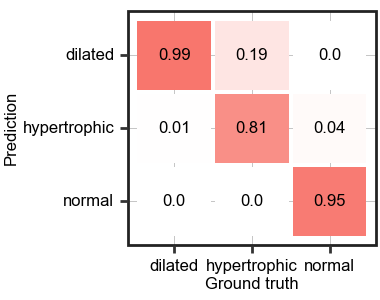

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.9 x 1.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_heatmap.pdf


In [119]:
melted_df = df.reset_index().melt(id_vars='index', var_name='category', value_name='value')
melted_df=round(melted_df,2)
melted_df.columns = ['Ground truth', 'Prediction', 'value']

melted_df


#heatmap

from plotnine import *
import pandas as pd
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"



plot_data=melted_df

#data.index=["m6A","m1A","A"]

y_axis = sorted(plot_data['Prediction'].unique(), reverse=True)

p=(ggplot(plot_data, aes("Ground truth", "Prediction", fill="value"))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label="value"), size=6)
 +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Arial",angle=0,color="black"),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            legend_position =  "none",figure_size=[1.9,1.5])  
  +scale_fill_gradient(low = "#FFFFFF", high = "#F8766D")  
  #+scale_y_discrete(labels=["m6A","m1A","A"])
  #+labs(x="Ground truth",y="Prediction")
  + scale_y_discrete(limits=y_axis)
  
)

print(p)
p.save("figure/heart_disease_heatmap.pdf")

In [120]:
# acc per patient

patien_id=meta_data_test["donor_id"].to_list()

true_list=[pred[i]==y_test[i] for i in range(len(pred))]
#convert to 0/1
true_list=[int(i) for i in true_list]
true_list

df=pd.DataFrame(dict(patient_id=patien_id,acc=true_list))

df=df.groupby("patient_id").mean()

df.reset_index(inplace=True)

df



,patient_id,acc
0,P1472,0.993775
1,P1504,0.984165
2,P1678,0.952224
3,P1702,0.963323
4,P1718,0.921860
5,P1722,0.790554
6,P1726,0.898425
7,P1735,0.348118


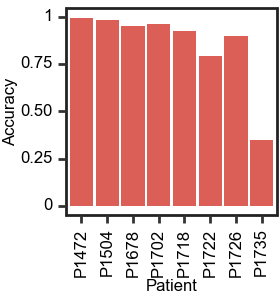

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.4 x 1.5 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_barplot_patient.pdf


In [121]:
melted_df = df.reset_index().melt(id_vars='index', var_name='category', value_name='value')
melted_df=round(melted_df,2)
melted_df.columns = ['Ground truth', 'Prediction', 'value']

melted_df


#heatmap

from plotnine import *
import pandas as pd
import numpy as np


black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"



plot_data=df

#data.index=["m6A","m1A","A"]

#y_axis = sorted(plot_data['Prediction'].unique(), reverse=True)

p=(ggplot(plot_data, aes("patient_id", "acc",fill=["#F8766D"]))
+geom_bar(stat="identity")
#+ geom_tile(aes(width=.95, height=.95))
# + geom_text(aes(label="value"), size=6)
 +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Arial",angle=90,color="black"),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            legend_position =  "none",figure_size=[1.4,1.5])  
  #+scale_fill_gradient(low = "#FFFFFF", high = "#F8766D")  
  #+scale_y_discrete(labels=["m6A","m1A","A"])
  +labs(x="Patient",y="Accuracy")
  #+ scale_y_discrete(limits=y_axis)
  #+scale_fill_manual("red")  # Set custom colors
)

print(p)
p.save("figure/heart_disease_barplot_patient.pdf")

/tmp/ipykernel_72777/2371978817.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_72777/2371978817.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_72777/2371978817.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../.conda/envs/sc/lib/python3.8/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dist

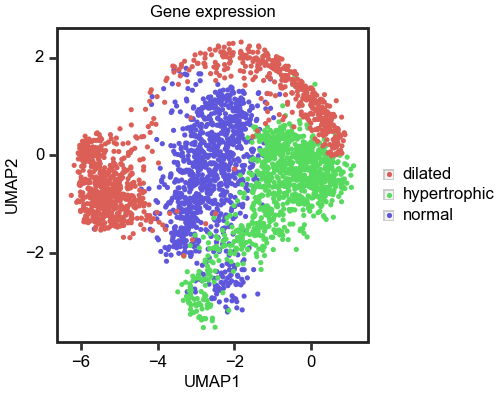

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.5 x 2 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_gene_expression_UMAP.pdf


In [25]:
#embedding

#Umap of data_rm_sparse
import umap
#import matplotlib.pyplot as plt

"""
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_rm_sparse_subset)

plt.scatter(embedding[:, 0], embedding[:, 1], c=[label_dict[item] for item in data_rm_sparse_subset.index], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the heart dataset', fontsize=24)
plt.show()
"""
data_rm_sparse

#random select 1000 cells from each cell type
import random
import numpy as np
import pandas as pd

gene_list=data_rm_sparse_test.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse_test.loc[cell_type].sample(n=1000,random_state=7))

data_rm_sparse_subset




#import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd

reducer=umap.UMAP(random_state=24)
embedding = reducer.fit_transform(data_rm_sparse_subset)

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


label=data_rm_sparse_subset.index.tolist()

label=[item.replace(" cardiomyopathy","") for item in label]

data=pd.DataFrame(embedding)
data.columns=["UMAP1","UMAP2"]
data["label"]=label



p =(ggplot(aes(x='UMAP1', y='UMAP2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=1)
    +theme(
        figure_size=[2.5,2],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.75,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("Gene expression")
    #+scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/heart_disease_gene_expression_UMAP.pdf')

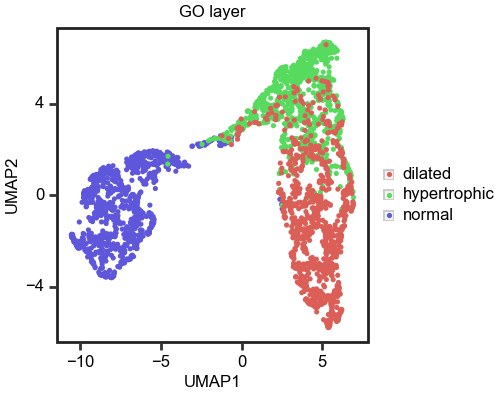

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.5 x 2 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_GO_embedding_UMAP.pdf


In [26]:
#test data_rm_sparse_subset

#model=pickle.load(open("model/GO_heart.model","rb"))


x_test=data_rm_sparse_subset.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
        
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
        
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)

    y_prob=outputs.detach().numpy()
    y_test=list(labels.numpy())

GO_sum=GO_sum.detach().numpy()
TF_derived_from_gene=TF_derived_from_gene.detach().numpy()
GO_derived_from_TF=GO_derived_from_TF.detach().numpy()


from plotnine import *
import pandas as pd

reducer=umap.UMAP(random_state=24)
embedding = reducer.fit_transform(GO_sum)

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


label=data_rm_sparse_subset.index.tolist()
label=[item.replace(" cardiomyopathy","") for item in label]

data=pd.DataFrame(embedding)
data.columns=["UMAP1","UMAP2"]
data["label"]=label



p =(ggplot(aes(x='UMAP1', y='UMAP2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=1)
    +theme(
        figure_size=[2.5,2],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.35,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("GO layer")
    #+scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/heart_disease_GO_embedding_UMAP.pdf')


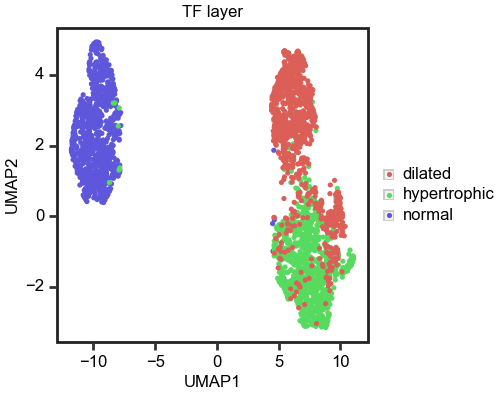

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.5 x 2 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/heart_disease_TF_embedding_UMAP.pdf


In [27]:
#test data_rm_sparse_subset

#model=pickle.load(open("model/GO_heart.model","rb"))


x_test=data_rm_sparse_subset.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
        
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
        
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)

    y_prob=outputs.detach().numpy()
    y_test=list(labels.numpy())

GO_sum=GO_sum.detach().numpy()
TF_derived_from_gene=TF_derived_from_gene.detach().numpy()
GO_derived_from_TF=GO_derived_from_TF.detach().numpy()


from plotnine import *
import pandas as pd

reducer=umap.UMAP(random_state=24)
embedding = reducer.fit_transform(TF_derived_from_gene)

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


label=data_rm_sparse_subset.index.tolist()
label=[item.replace(" cardiomyopathy","") for item in label]

data=pd.DataFrame(embedding)
data.columns=["UMAP1","UMAP2"]
data["label"]=label



p =(ggplot(aes(x='UMAP1', y='UMAP2',color='factor(label)'), data)
    + geom_point(size=0.05,alpha=1)
    +theme(
        figure_size=[2.5,2],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.35,0.9), 
        legend_direction='vertical',
        #legend_position='right',
        legend_key_size=4) #change legend text font size))
    #+scale_color_manual(values =[c1, c2, c3]) 
    #+geom_density_2d(colour = "#F8766D",size=0.2,data=data_U,alpha=0.5)
    #+geom_density_2d(colour = "#00BA38",size=0.2,data=data_psU,alpha=0.5)
    +ggtitle("TF layer")
    #+scale_fill_manual(values=[c1, c2, c3])  
   )
#+ facet_wrap('G')
print(p)
p.save('figure/heart_disease_TF_embedding_UMAP.pdf')


In [31]:
#in silico deletion normal
import torch.nn.functional as F
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

gene_list=data_rm_sparse_train.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse_train.loc[cell_type].sample(n=1000,random_state=1))

data_rm_sparse_subset






#orginal probbility
data_rm_sparse_subset_normal=data_rm_sparse_subset[data_rm_sparse_subset.index=="normal"]

x_test=data_rm_sparse_subset_normal.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)


            
    y_prob=outputs.detach().numpy()
    y_test=list(labels.numpy())

#softmax of y_prob, use torch


y_prob_softmax_origin=F.softmax(torch.tensor(y_prob),dim=1)

print(y_prob_softmax_origin)



def compare_prob(y_prob_softmax_origin,y_prob_softmax_shift):
    """
    y_prob_softmax_origin: the original softmax probability
    y_prob_softmax_shift: the shifted softmax probability
    """
    #output the proportion of probability increase for each class (a total of 3 classes)

    class_0_origin=y_prob_softmax_origin[:,0]
    class_0_shift=y_prob_softmax_shift[:,0]

    class_1_origin=y_prob_softmax_origin[:,1]
    class_1_shift=y_prob_softmax_shift[:,1]

    class_2_origin=y_prob_softmax_origin[:,2]
    class_2_shift=y_prob_softmax_shift[:,2]

    #statistic the number of cells that have increased probability for each class
    class_0_increase = sum(class_0_shift>class_0_origin)
    class_1_increase = sum(class_1_shift>class_1_origin)
    class_2_increase = sum(class_2_shift>class_2_origin)
    
    return class_0_increase,class_1_increase,class_2_increase




#select index=="normal"
N_to_H_KD_dict={}
N_to_D_KD_dict={}



for i in range(len(data_rm_sparse_subset.columns)):

    if i%500==0:
        print(i)

    data_rm_sparse_subset_normal=data_rm_sparse_subset[data_rm_sparse_subset.index=="normal"]

    data_rm_sparse_subset_normal

    #Knock down gene expression

    data_rm_sparse_subset_normal.iloc[:,i] = data_rm_sparse_subset_normal.iloc[:,i]*0.5

    #model=pickle.load(open("model/GO_heart.model","rb"))



    x_test=data_rm_sparse_subset_normal.to_numpy()
    y_test=data_rm_sparse_subset.index.tolist()

    y_test_relabeled=[label_dict[label] for label in y_test]

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
    result=[]
    y_prob=[]
    y_test=[]
    for j, data in enumerate(test_loader):
        inputs, labels = data
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
  
            
        y_prob=outputs.detach().numpy()

        y_prob_softmax_shift=F.softmax(torch.tensor(y_prob),dim=1)

        class_0_increase,class_1_increase,class_2_increase=compare_prob(y_prob_softmax_origin,y_prob_softmax_shift)


        N_to_H_KD_dict[data_rm_sparse_subset.columns[i]]=class_1_increase

        N_to_D_KD_dict[data_rm_sparse_subset.columns[i]]=class_2_increase

        y_test=list(labels.numpy())


tensor([[9.9984e-01, 1.0943e-04, 5.3465e-05],
        [9.9954e-01, 4.6241e-04, 8.6185e-09],
        [9.9965e-01, 3.5433e-04, 1.3127e-07],
        ...,
        [9.9987e-01, 1.2555e-04, 4.8416e-08],
        [9.9978e-01, 2.1910e-04, 1.6291e-06],
        [9.9974e-01, 2.3321e-04, 2.3588e-05]])
0
500
1000
1500
2000
2500
3000
3500


In [31]:
#in silico activation normal
import torch.nn.functional as F
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

gene_list=data_rm_sparse_train.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse_train.loc[cell_type].sample(n=1000,random_state=1))

data_rm_sparse_subset






#orginal probbility
data_rm_sparse_subset_normal=data_rm_sparse_subset[data_rm_sparse_subset.index=="normal"]

x_test=data_rm_sparse_subset_normal.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)


            
    y_prob=outputs.detach().numpy()
    y_test=list(labels.numpy())

#softmax of y_prob, use torch


y_prob_softmax_origin=F.softmax(torch.tensor(y_prob),dim=1)

print(y_prob_softmax_origin)



def compare_prob(y_prob_softmax_origin,y_prob_softmax_shift):
    """
    y_prob_softmax_origin: the original softmax probability
    y_prob_softmax_shift: the shifted softmax probability
    """
    #output the proportion of probability increase for each class (a total of 3 classes)

    class_0_origin=y_prob_softmax_origin[:,0]
    class_0_shift=y_prob_softmax_shift[:,0]

    class_1_origin=y_prob_softmax_origin[:,1]
    class_1_shift=y_prob_softmax_shift[:,1]

    class_2_origin=y_prob_softmax_origin[:,2]
    class_2_shift=y_prob_softmax_shift[:,2]

    #statistic the number of cells that have increased probability for each class
    class_0_increase = sum(class_0_shift>class_0_origin)
    class_1_increase = sum(class_1_shift>class_1_origin)
    class_2_increase = sum(class_2_shift>class_2_origin)
    
    return class_0_increase,class_1_increase,class_2_increase




#select index=="normal"
N_to_H_OE_dict={}
N_to_D_OE_dict={}



for i in range(len(data_rm_sparse_subset.columns)):

    if i%500==0:
        print(i)

    data_rm_sparse_subset_normal=data_rm_sparse_subset[data_rm_sparse_subset.index=="normal"]

    data_rm_sparse_subset_normal_copy=data_rm_sparse_subset_normal.copy()

    #Knock down gene expression
    
    data_rm_sparse_subset_normal_copy.iloc[:,i] = data_rm_sparse_subset_normal_copy.iloc[:,i]*2

    #model=pickle.load(open("model/GO_heart.model","rb"))



    x_test=data_rm_sparse_subset_normal.to_numpy()
    y_test=data_rm_sparse_subset.index.tolist()

    y_test_relabeled=[label_dict[label] for label in y_test]

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
    result=[]
    y_prob=[]
    y_test=[]
    for j, data in enumerate(test_loader):
        inputs, labels = data
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
  
            
        y_prob=outputs.detach().numpy()

        y_prob_softmax_shift=F.softmax(torch.tensor(y_prob),dim=1)

        class_0_increase,class_1_increase,class_2_increase=compare_prob(y_prob_softmax_origin,y_prob_softmax_shift)


        N_to_H_OE_dict[data_rm_sparse_subset.columns[i]]=class_1_increase

        N_to_D_OE_dict[data_rm_sparse_subset.columns[i]]=class_2_increase

        y_test=list(labels.numpy())


tensor([[9.9711e-01, 7.2812e-09, 2.8911e-03],
        [9.9999e-01, 6.9221e-06, 9.3034e-21],
        [1.0000e+00, 3.5561e-10, 6.0673e-16],
        ...,
        [1.0000e+00, 9.6492e-10, 2.2150e-16],
        [1.0000e+00, 1.2798e-10, 2.6636e-12],
        [1.0000e+00, 6.6616e-09, 1.7044e-14]])
0
500
1000
1500
2000


KeyboardInterrupt: 

In [33]:
#in silico activation hyptertrophic -> normal
import torch.nn.functional as F

shift_list=[]

gene_list=data_rm_sparse.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse.loc[cell_type].sample(n=500,random_state=1))

data_rm_sparse_subset

data_rm_sparse_subset


#orginal probbility
data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="hypertrophic cardiomyopathy"]

x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)


            
    y_prob=outputs.detach().numpy()/10
    y_test=list(labels.numpy())

#softmax of y_prob, use torch


y_prob_softmax_origin=F.softmax(torch.tensor(y_prob),dim=1)

print(y_prob_softmax_origin)



def compare_prob(y_prob_softmax_origin,y_prob_softmax_shift):
    """
    y_prob_softmax_origin: the original softmax probability
    y_prob_softmax_shift: the shifted softmax probability
    """
    #output the proportion of probability increase for each class (a total of 3 classes)

    class_0_origin=y_prob_softmax_origin[:,0]
    class_0_shift=y_prob_softmax_shift[:,0]

    class_1_origin=y_prob_softmax_origin[:,1]
    class_1_shift=y_prob_softmax_shift[:,1]

    class_2_origin=y_prob_softmax_origin[:,2]
    class_2_shift=y_prob_softmax_shift[:,2]

    #statistic the number of cells that have increased probability for each class
    class_0_increase = sum(class_0_shift>class_0_origin)
    class_1_increase = sum(class_1_shift>class_1_origin)
    class_2_increase = sum(class_2_shift>class_2_origin)
    
    return class_0_increase,class_1_increase,class_2_increase




#select index=="normal"
#hypertrophic_cardiomyopathy_to_normal_activation_gene_list=[]
H_to_N_OE_dict={}


for i in range(len(data_rm_sparse_subset.columns)):

    data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="hypertrophic cardiomyopathy"]

    data_rm_sparse_subset_hypertrophic_copy=data_rm_sparse_subset_hypertrophic.copy()

    #set the first column to 10
    #if 
    data_rm_sparse_subset_hypertrophic_copy.iloc[:,i] = data_rm_sparse_subset_hypertrophic_copy.iloc[:,i]*2

    #set the  zero element of data_rm_sparse_subset_normal.iloc[:,i]  to 4
    #data_rm_sparse_subset_normal.iloc[:,i]=data_rm_sparse_subset_normal.iloc[:,i].replace(0,4)





    #model=pickle.load(open("model/GO_heart.model","rb"))



    x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
    y_test=data_rm_sparse_subset.index.tolist()

    y_test_relabeled=[label_dict[label] for label in y_test]

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
    result=[]
    y_prob=[]
    y_test=[]
    for j, data in enumerate(test_loader):
        inputs, labels = data
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
  
            
        y_prob=outputs.detach().numpy()/10

        y_prob_softmax_shift=F.softmax(torch.tensor(y_prob),dim=1)

        class_0_increase,class_1_increase,class_2_increase=compare_prob(y_prob_softmax_origin,y_prob_softmax_shift)


        H_to_N_OE_dict[data_rm_sparse_subset.columns[i]]=class_0_increase


        y_test=list(labels.numpy())

tensor([[0.1244, 0.5043, 0.3713],
        [0.1405, 0.5385, 0.3210],
        [0.1426, 0.5600, 0.2974],
        ...,
        [0.2275, 0.4601, 0.3124],
        [0.1556, 0.5777, 0.2667],
        [0.1623, 0.5169, 0.3208]])


In [34]:
#in silico deletion hyptertrophic -> normal
import torch.nn.functional as F

shift_list=[]

gene_list=data_rm_sparse.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse.loc[cell_type].sample(n=500,random_state=1))

data_rm_sparse_subset

data_rm_sparse_subset


#orginal probbility
data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="hypertrophic cardiomyopathy"]

x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)


            
    y_prob=outputs.detach().numpy()/10
    y_test=list(labels.numpy())

#softmax of y_prob, use torch


y_prob_softmax_origin=F.softmax(torch.tensor(y_prob),dim=1)

print(y_prob_softmax_origin)



def compare_prob(y_prob_softmax_origin,y_prob_softmax_shift):
    """
    y_prob_softmax_origin: the original softmax probability
    y_prob_softmax_shift: the shifted softmax probability
    """
    #output the proportion of probability increase for each class (a total of 3 classes)

    class_0_origin=y_prob_softmax_origin[:,0]
    class_0_shift=y_prob_softmax_shift[:,0]

    class_1_origin=y_prob_softmax_origin[:,1]
    class_1_shift=y_prob_softmax_shift[:,1]

    class_2_origin=y_prob_softmax_origin[:,2]
    class_2_shift=y_prob_softmax_shift[:,2]

    #statistic the number of cells that have increased probability for each class
    class_0_increase = sum(class_0_shift>class_0_origin)
    class_1_increase = sum(class_1_shift>class_1_origin)
    class_2_increase = sum(class_2_shift>class_2_origin)
    
    return class_0_increase,class_1_increase,class_2_increase




#select index=="normal"
#hypertrophic_cardiomyopathy_to_normal_activation_gene_list=[]
H_to_N_KD_dict={}


for i in range(len(data_rm_sparse_subset.columns)):

    if i%500==0:
        print(i)

    data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="hypertrophic cardiomyopathy"]

    data_rm_sparse_subset_hypertrophic

    #set the first column to 10
    #if 
    data_rm_sparse_subset_hypertrophic.iloc[:,i] = data_rm_sparse_subset_hypertrophic.iloc[:,i]*0.5

    #set the  zero element of data_rm_sparse_subset_normal.iloc[:,i]  to 4
    #data_rm_sparse_subset_normal.iloc[:,i]=data_rm_sparse_subset_normal.iloc[:,i].replace(0,4)





    #model=pickle.load(open("model/GO_heart.model","rb"))



    x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
    y_test=data_rm_sparse_subset.index.tolist()

    y_test_relabeled=[label_dict[label] for label in y_test]

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
    result=[]
    y_prob=[]
    y_test=[]
    for j, data in enumerate(test_loader):
        inputs, labels = data
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
  
            
        y_prob=outputs.detach().numpy()/10

        y_prob_softmax_shift=F.softmax(torch.tensor(y_prob),dim=1)

        class_0_increase,class_1_increase,class_2_increase=compare_prob(y_prob_softmax_origin,y_prob_softmax_shift)


        H_to_N_KD_dict[data_rm_sparse_subset.columns[i]]=class_0_increase


        y_test=list(labels.numpy())

tensor([[0.1244, 0.5043, 0.3713],
        [0.1405, 0.5385, 0.3210],
        [0.1426, 0.5600, 0.2974],
        ...,
        [0.2275, 0.4601, 0.3124],
        [0.1556, 0.5777, 0.2667],
        [0.1623, 0.5169, 0.3208]])
0
500
1000
1500
2000
2500
3000
3500


In [21]:
#in silico activation dilated -> normal
import torch.nn.functional as F
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

shift_list=[]

gene_list=data_rm_sparse.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse.loc[cell_type].sample(n=500,random_state=1))

data_rm_sparse_subset

data_rm_sparse_subset


#orginal probbility
data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="dilated cardiomyopathy"]

x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)


            
    y_prob=outputs.detach().numpy()/10
    y_test=list(labels.numpy())

#softmax of y_prob, use torch


y_prob_softmax_origin=F.softmax(torch.tensor(y_prob),dim=1)

print(y_prob_softmax_origin)



def compare_prob(y_prob_softmax_origin,y_prob_softmax_shift):
    """
    y_prob_softmax_origin: the original softmax probability
    y_prob_softmax_shift: the shifted softmax probability
    """
    #output the proportion of probability increase for each class (a total of 3 classes)

    class_0_origin=y_prob_softmax_origin[:,0]
    class_0_shift=y_prob_softmax_shift[:,0]

    class_1_origin=y_prob_softmax_origin[:,1]
    class_1_shift=y_prob_softmax_shift[:,1]

    class_2_origin=y_prob_softmax_origin[:,2]
    class_2_shift=y_prob_softmax_shift[:,2]

    #statistic the number of cells that have increased probability for each class
    class_0_increase = sum(class_0_shift>class_0_origin)
    class_1_increase = sum(class_1_shift>class_1_origin)
    class_2_increase = sum(class_2_shift>class_2_origin)
    
    return class_0_increase,class_1_increase,class_2_increase




#select index=="normal"
#hypertrophic_cardiomyopathy_to_normal_activation_gene_list=[]
D_to_N_OE_dict={}


for i in range(len(data_rm_sparse_subset.columns)):

    if i%500==0:
        print(i)

    data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="dilated cardiomyopathy"]

    data_rm_sparse_subset_hypertrophic

    #set the first column to 10
    #if 
    data_rm_sparse_subset_hypertrophic.iloc[:,i] = data_rm_sparse_subset_hypertrophic.iloc[:,i]*2

    #set the  zero element of data_rm_sparse_subset_normal.iloc[:,i]  to 4
    #data_rm_sparse_subset_normal.iloc[:,i]=data_rm_sparse_subset_normal.iloc[:,i].replace(0,4)





    #model=pickle.load(open("model/GO_heart.model","rb"))



    x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
    y_test=data_rm_sparse_subset.index.tolist()

    y_test_relabeled=[label_dict[label] for label in y_test]

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
    result=[]
    y_prob=[]
    y_test=[]
    for j, data in enumerate(test_loader):
        inputs, labels = data
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
  
            
        y_prob=outputs.detach().numpy()/10

        y_prob_softmax_shift=F.softmax(torch.tensor(y_prob),dim=1)

        class_0_increase,class_1_increase,class_2_increase=compare_prob(y_prob_softmax_origin,y_prob_softmax_shift)


        D_to_N_OE_dict[data_rm_sparse_subset.columns[i]]=class_0_increase


        y_test=list(labels.numpy())

tensor([[0.2159, 0.2901, 0.4940],
        [0.0706, 0.3458, 0.5836],
        [0.0765, 0.2191, 0.7044],
        ...,
        [0.1183, 0.2155, 0.6662],
        [0.1198, 0.2559, 0.6243],
        [0.1374, 0.2774, 0.5852]])
0
500
1000
1500
2000
2500
3000
3500


In [22]:
#in silico deletion dilated -> normal
import torch.nn.functional as F
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

shift_list=[]

gene_list=data_rm_sparse.columns.tolist()

data_rm_sparse_subset=pd.DataFrame(columns=gene_list)

for cell_type in classes:
    data_rm_sparse_subset=data_rm_sparse_subset.append(data_rm_sparse.loc[cell_type].sample(n=500,random_state=1))



#orginal probbility
data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="dilated cardiomyopathy"]

x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
y_test=data_rm_sparse_subset.index.tolist()

y_test_relabeled=[label_dict[label] for label in y_test]

test_data=MyDataset(x_test,y_test_relabeled)
test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
result=[]
y_prob=[]
y_test=[]
for i, data in enumerate(test_loader):
    inputs, labels = data
            
    inputs=Variable(inputs).to(torch.float32)

    labels=Variable(labels).to(torch.long)
            
    outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
    pred = list(torch.max(outputs, 1)[1].numpy())
    result.extend(pred)
            
    y_prob=outputs.detach().numpy()/10
    y_test=list(labels.numpy())

#softmax of y_prob, use torch

y_prob_softmax_origin=F.softmax(torch.tensor(y_prob),dim=1)

print(y_prob_softmax_origin)


def compare_prob(y_prob_softmax_origin,y_prob_softmax_shift):
    """
    y_prob_softmax_origin: the original softmax probability
    y_prob_softmax_shift: the shifted softmax probability
    """
    #output the proportion of probability increase for each class (a total of 3 classes)

    class_0_origin=y_prob_softmax_origin[:,0]
    class_0_shift=y_prob_softmax_shift[:,0]

    class_1_origin=y_prob_softmax_origin[:,1]
    class_1_shift=y_prob_softmax_shift[:,1]

    class_2_origin=y_prob_softmax_origin[:,2]
    class_2_shift=y_prob_softmax_shift[:,2]

    #statistic the number of cells that have increased probability for each class
    class_0_increase = sum(class_0_shift>class_0_origin)
    class_1_increase = sum(class_1_shift>class_1_origin)
    class_2_increase = sum(class_2_shift>class_2_origin)
    
    return class_0_increase,class_1_increase,class_2_increase


#select index=="normal"
#hypertrophic_cardiomyopathy_to_normal_activation_gene_list=[]
D_to_N_KD_dict={}


for i in range(len(data_rm_sparse_subset.columns)):

    if i%500==0:
        print(i)

    data_rm_sparse_subset_hypertrophic=data_rm_sparse_subset[data_rm_sparse_subset.index=="dilated cardiomyopathy"]

    data_rm_sparse_subset_hypertrophic

    #set the first column to 10
    #if 
    data_rm_sparse_subset_hypertrophic.iloc[:,i] = data_rm_sparse_subset_hypertrophic.iloc[:,i]*0.5

    #set the  zero element of data_rm_sparse_subset_normal.iloc[:,i]  to 4
    #data_rm_sparse_subset_normal.iloc[:,i]=data_rm_sparse_subset_normal.iloc[:,i].replace(0,4)

    #model=pickle.load(open("model/GO_heart.model","rb"))

    x_test=data_rm_sparse_subset_hypertrophic.to_numpy()
    y_test=data_rm_sparse_subset.index.tolist()

    y_test_relabeled=[label_dict[label] for label in y_test]

    test_data=MyDataset(x_test,y_test_relabeled)
    test_loader=DataLoader(test_data, batch_size=3000, shuffle=False)
    result=[]
    y_prob=[]
    y_test=[]
    for j, data in enumerate(test_loader):
        inputs, labels = data
            
        inputs=Variable(inputs).to(torch.float32)

        labels=Variable(labels).to(torch.long)
            
        outputs,GO_sum,TF_derived_from_gene,GO_derived_from_TF = model(inputs)    #x,GO_sum,TF_derived_from_gene,GO_derived_from_TF
        pred = list(torch.max(outputs, 1)[1].numpy())
        result.extend(pred)
  
            
        y_prob=outputs.detach().numpy()/10

        y_prob_softmax_shift=F.softmax(torch.tensor(y_prob),dim=1)

        class_0_increase,class_1_increase,class_2_increase=compare_prob(y_prob_softmax_origin,y_prob_softmax_shift)


        D_to_N_KD_dict[data_rm_sparse_subset.columns[i]]=class_0_increase


        y_test=list(labels.numpy())

tensor([[0.2159, 0.2901, 0.4940],
        [0.0706, 0.3458, 0.5836],
        [0.0765, 0.2191, 0.7044],
        ...,
        [0.1183, 0.2155, 0.6662],
        [0.1198, 0.2559, 0.6243],
        [0.1374, 0.2774, 0.5852]])
0
500
1000
1500
2000
2500
3000
3500


In [37]:
N_to_H_OE_dict
N_to_H_KD_dict

N_to_D_OE_dict
N_to_D_KD_dict

H_to_N_OE_dict
H_to_N_KD_dict

D_to_N_OE_dict
D_to_N_KD_dict

#save the result
import pickle

with open("data/heart/N_to_H_OE_dict.pickle","wb") as f:
    pickle.dump(N_to_H_OE_dict,f)

with open("data/heart/N_to_H_KD_dict.pickle","wb") as f:
    pickle.dump(N_to_H_KD_dict,f)

with open("data/heart/N_to_D_OE_dict.pickle","wb") as f:
    pickle.dump(N_to_D_OE_dict,f)

with open("data/heart/N_to_D_KD_dict.pickle","wb") as f:
    pickle.dump(N_to_D_KD_dict,f)

with open("data/heart/H_to_N_OE_dict.pickle","wb") as f:
    pickle.dump(H_to_N_OE_dict,f)

with open("data/heart/H_to_N_KD_dict.pickle","wb") as f:
    pickle.dump(H_to_N_KD_dict,f)
    
with open("data/heart/D_to_N_OE_dict.pickle","wb") as f:
    pickle.dump(D_to_N_OE_dict,f)

with open("data/heart/D_to_N_KD_dict.pickle","wb") as f:
    pickle.dump(D_to_N_KD_dict,f)


In [1]:
#load the result
import pickle

with open("data/heart/N_to_H_OE_dict.pickle","rb") as f:
    N_to_H_OE_dict=pickle.load(f)

with open("data/heart/N_to_H_KD_dict.pickle","rb") as f:
    N_to_H_KD_dict=pickle.load(f)

with open("data/heart/N_to_D_OE_dict.pickle","rb") as f:
    N_to_D_OE_dict=pickle.load(f)

with open("data/heart/N_to_D_KD_dict.pickle","rb") as f:
    N_to_D_KD_dict=pickle.load(f)

with open("data/heart/H_to_N_OE_dict.pickle","rb") as f:
    H_to_N_OE_dict=pickle.load(f)

with open("data/heart/H_to_N_KD_dict.pickle","rb") as f:
    H_to_N_KD_dict=pickle.load(f)

with open("data/heart/D_to_N_OE_dict.pickle","rb") as f:
    D_to_N_OE_dict=pickle.load(f)

with open("data/heart/D_to_N_KD_dict.pickle","rb") as f:
    D_to_N_KD_dict=pickle.load(f)
    
    

In [2]:
S1=sorted(N_to_H_OE_dict, key=lambda k: N_to_H_OE_dict[k], reverse=True)[:200]
S2=sorted(H_to_N_KD_dict, key=lambda k: H_to_N_KD_dict[k], reverse=True)[:200]

S3=sorted(N_to_H_KD_dict, key=lambda k: N_to_H_KD_dict[k], reverse=True)[:200]
S4=sorted(H_to_N_OE_dict, key=lambda k: H_to_N_OE_dict[k], reverse=True)[:200]

S5=sorted(N_to_D_OE_dict, key=lambda k: N_to_D_OE_dict[k], reverse=True)[:200]
S6=sorted(D_to_N_KD_dict, key=lambda k: D_to_N_KD_dict[k], reverse=True)[:200]

S7=sorted(N_to_D_KD_dict, key=lambda k: N_to_D_KD_dict[k], reverse=True)[:200]
S8=sorted(D_to_N_OE_dict, key=lambda k: D_to_N_OE_dict[k], reverse=True)[:200]


In [6]:
S4

['MALAT1',
 'LAMA2',
 'PDLIM5',
 'NEAT1',
 'RYR2',
 'NEBL',
 'TTN-AS1',
 'ABLIM1',
 'SORBS1',
 'SGCD',
 'MYBPC3',
 'PALLD',
 'MLIP',
 'PRKG1',
 'MYOM1',
 'DMD',
 'NEXN',
 'FHL2',
 'RCAN2',
 'CDH2',
 'PLCL1',
 'FILIP1',
 'PCDH9',
 'CD36',
 'MAST4',
 'MYOZ2',
 'FHIT',
 'DTNA',
 'PDZRN3',
 'CDH13',
 'EFNA5',
 'NLGN1',
 'SYNPO2',
 'KANK1',
 'NCAM1',
 'TPM1',
 'CBLB',
 'SAMD4A',
 'CELF2',
 'PTPRG',
 'DLC1',
 'FGF12',
 'GALNT17',
 'MEF2A',
 'MBNL1',
 'FBXL7',
 'TENM2',
 'FNDC3B',
 'LRRFIP2',
 'PDZD2',
 'PLCXD3',
 'NFIA',
 'PDE7A',
 'PKP2',
 'MITF',
 'ARHGAP24',
 'MYO18B',
 'ARID1B',
 'GPHN',
 'PCDH7',
 'ZNF638',
 'SH3D19',
 'TBC1D4',
 'VWA8',
 'SPTBN1',
 'GBE1',
 'RASAL2',
 'MEIS2',
 'RBFOX1',
 'CFLAR',
 'CRADD',
 'ATP2A2',
 'ARHGAP26',
 'PARD3',
 'LDLRAD4',
 'CERS6',
 'THRB',
 'LRRTM3',
 'PDE4D',
 'TRPM7',
 'SBF2',
 'PLCL2',
 'PHACTR1',
 'LRRFIP1',
 'ZFAND3',
 'ACACB',
 'SIK3',
 'DANT2',
 'RBM20',
 'PBX1',
 'ARHGAP10',
 'SYNE1',
 'LIMCH1',
 'PIK3R1',
 'TBC1D5',
 'CHCHD3',
 'PPFIBP1',
 'KIAA

In [150]:
#OE shift normal to hypertrophic
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


set1=set(S1)
set2=set(S2)
fontsize=18
plt.figure(figsize=(6, 6))  # 8 inches wide and 6 inches tall

venn=venn2([set1, set2], ('OE shift normal\n to hypertrophic', 'KD shift hypertrophic\n to normal'))
plt.title("Overlap of disease-related genes and\n predicted therapeutic targets",fontsize=fontsize)

venn.get_label_by_id('10').set_fontsize(fontsize)
venn.get_label_by_id('01').set_fontsize(fontsize)
venn.get_label_by_id('11').set_fontsize(fontsize)

venn.get_label_by_id('A').set_fontsize(fontsize)
venn.get_label_by_id('B').set_fontsize(fontsize)

#plt.show()
plt.savefig("figure/venn_N_to_H_OE.pdf", dpi=1200,format='pdf')

In [148]:
#KD shift normal to hypertrophic
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


set1=set(S3)
set2=set(S4)
fontsize=18

plt.figure(figsize=(6, 6))  # 8 inches wide and 6 inches tall

venn=venn2([set1, set2], ('KD shift normal\n to hypertrophic', 'OE shift hypertrophic\n to normal'))
plt.title("Overlap of disease-related genes and\n predicted therapeutic targets",fontsize=fontsize)

venn.get_label_by_id('10').set_fontsize(fontsize)
venn.get_label_by_id('01').set_fontsize(fontsize)
venn.get_label_by_id('11').set_fontsize(fontsize)

venn.get_label_by_id('A').set_fontsize(fontsize)
venn.get_label_by_id('B').set_fontsize(fontsize)

#plt.show()
plt.savefig("figure/venn_N_to_H_KD.pdf", dpi=1200,format='pdf')



In [149]:
#OE shift normal to dilated
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


set1=set(S5)
set2=set(S6)
fontsize=18

plt.figure(figsize=(6, 6))  # 8 inches wide and 6 inches tall

venn=venn2([set1, set2], ('OE shift normal\n to dilated', 'KD shift dilated\n to normal'))
plt.title("Overlap of disease-related genes and\n predicted therapeutic targets",fontsize=fontsize)

venn.get_label_by_id('10').set_fontsize(fontsize)
venn.get_label_by_id('01').set_fontsize(fontsize)
venn.get_label_by_id('11').set_fontsize(fontsize)

venn.get_label_by_id('A').set_fontsize(fontsize)
venn.get_label_by_id('B').set_fontsize(fontsize)

#plt.show()
plt.savefig("figure/venn_N_to_D_OE.pdf", dpi=1200,format='pdf')



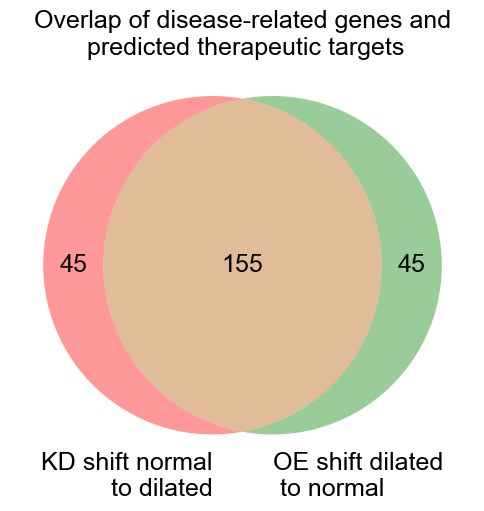

In [26]:
#KD shift normal to dilated
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


set1=set(S7)
set2=set(S8)
fontsize=18

plt.figure(figsize=(6, 6))  # 8 inches wide and 6 inches tall

venn=venn2([set1, set2], ('KD shift normal\n to dilated', 'OE shift dilated\n to normal'))
plt.title("Overlap of disease-related genes and\n predicted therapeutic targets",fontsize=fontsize)

venn.get_label_by_id('10').set_fontsize(fontsize)
venn.get_label_by_id('01').set_fontsize(fontsize)
venn.get_label_by_id('11').set_fontsize(fontsize)

venn.get_label_by_id('A').set_fontsize(fontsize)
venn.get_label_by_id('B').set_fontsize(fontsize)

#plt.show()
plt.savefig("figure/venn_N_to_D_KD.pdf", dpi=1200,format='pdf')

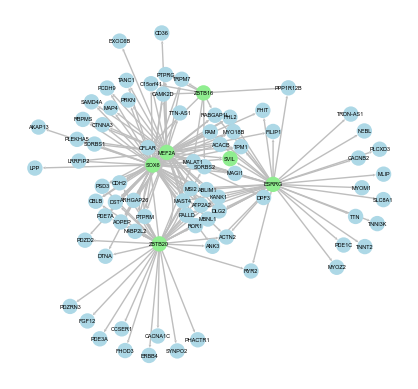

In [21]:
#OE or KD shift normal to hypertrophic   
#S1+S2+S3+S4

gene_list1 = [gene for gene in S1 if gene in S2][:50]
gene_list2 = [gene for gene in S3 if gene in S4][:50]

gene_list=gene_list1+gene_list2

import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    bbox=(1200, 1200),
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=4,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/igraph_N_to_H_OE_and_KD.pdf', dpi=1200,format='pdf')

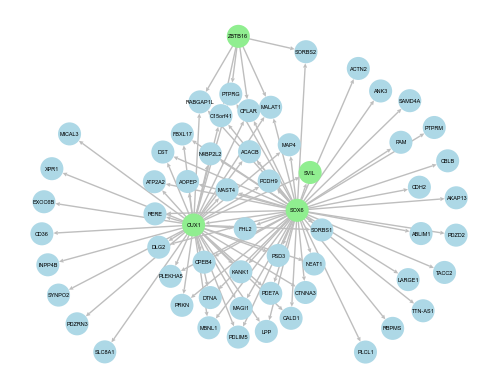

In [23]:
#OE or KD shift normal to dilated
#S5+S6+S7+S8

gene_list1 = [gene for gene in S5 if gene in S6][:50]
gene_list2 = [gene for gene in S7 if gene in S8][:50]

gene_list=gene_list1+gene_list2

import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    bbox=(1200, 1200),
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=4,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/igraph_N_to_D_OE_and_KD.pdf', dpi=1200,format='pdf')

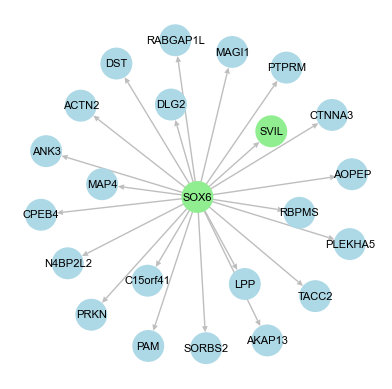

In [34]:
#figure 1

gene_list = [gene for gene in S5 if gene in S6][:40]




import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    bbox=(1200, 1200),
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=8,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/figure1_igraph.pdf', dpi=1200,format='pdf')

In [143]:
#OE shift normal to hypertrophic
#S1 and S2

gene_list = [gene for gene in S1 if gene in S2][:50]



import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=6,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/igraph_N_to_H_OE.pdf', dpi=1200,format='pdf')

In [144]:
#KD shift normal to hypertrophic
#S3 and S4

gene_list = [gene for gene in S3 if gene in S4][:50]

import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=6,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/igraph_N_to_H_KD.pdf', dpi=1200,format='pdf')

In [145]:
#OE shift normal to dilated
#S5 and S6

gene_list = [gene for gene in S5 if gene in S6][:50]

import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=6,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/igraph_N_to_D_OE.pdf', dpi=1200,format='pdf')


In [29]:
gene_list

['MALAT1',
 'RYR2',
 'ABLIM1',
 'NEAT1',
 'TTN',
 'LAMA2',
 'PDLIM5',
 'FHL2',
 'MYBPC3',
 'SGCD',
 'TTN-AS1',
 'MLIP',
 'SORBS1',
 'PRKG1',
 'MYOM1',
 'DMD',
 'NEXN',
 'CD36',
 'PLCL1',
 'LARGE1',
 'PDZRN3',
 'MAST4',
 'FILIP1',
 'CDH13',
 'CDH2',
 'PDE7A',
 'ZBTB16',
 'ATP2A2',
 'PSD3',
 'RCAN2',
 'MYOZ2',
 'DTNA',
 'PTPRG',
 'CBLB',
 'TENM2',
 'FHIT',
 'KANK1',
 'PCDH9',
 'PDZD2',
 'PHACTR1',
 'MBNL1',
 'SAMD4A',
 'ACACB',
 'NLGN1',
 'PDK4',
 'GALNT17',
 'PLCXD3',
 'CFLAR',
 'SYNPO2',
 'RBFOX1']

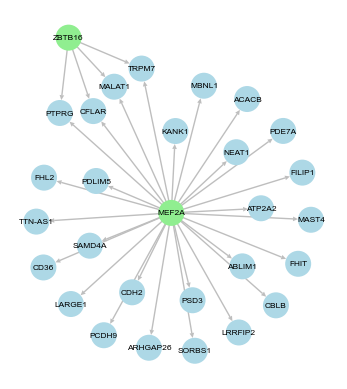

In [31]:
#KD shift normal to dilated
#S7 and S8

gene_list = [gene for gene in S7 if gene in S8][:55]

import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

#build the formula from TF_gene_dict
formula=[]
for gene in gene_list:
    
    if gene in TF_gene_dict:
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in gene_list:
                #print("%s->%s" % (gene, target_gene))
                formula.append("%s->%s" % (gene, target_gene))


#find the maximum linked set
def find_maximum_linked_set(linked_nodes_list):
    graph = {}
    
    # Build the graph from the linked nodes list
    for link in linked_nodes_list:
        src, dest = link.split('->')
        graph.setdefault(src, set()).add(dest)
        graph.setdefault(dest, set()).add(src)
    
    def dfs(node, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited)

    max_linked_set = []
    for node in graph:
        visited = set()
        dfs(node, visited)
        if len(visited) > len(max_linked_set):
            max_linked_set = list(visited)

    return max_linked_set


# Example linked nodes list
linked_nodes_list = formula

# Find the maximum set of nodes that are linked together
maximum_subset = find_maximum_linked_set(linked_nodes_list)


#set parameters
gene_relation=[]
color_dict={}
for i,gene in enumerate(maximum_subset):
    if gene in TF_gene_dict:
        color_dict[gene]="lightgreen"
        target_gene_list = TF_gene_dict[gene]

        for target_gene in target_gene_list:
            if target_gene in maximum_subset:
                j=maximum_subset.index(target_gene)
                gene_relation.append("%s->%s" % (i, j))

formula=",".join(gene_relation)

color_list=[]



#split by ',' or '->', use re
import re
re.split(',|->',formula)


names=[]
indice=re.split(',|->',formula)
for index in indice:
    index=int(index)
    if maximum_subset[index] not in names:
        names.append(maximum_subset[index])


color_list
for gene in names:
    color_list.append(color_dict.get(gene,"lightblue"))

#example
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Formula(
    formula,
)

node_names = maximum_subset
g.vs['name'] = names



articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    vertex_frame_width=0,
    #vertex_color="lightblue",
    vertex_color=color_list,
    #vertex_label=range(g.vcount()),
    vertex_label=g.vs["name"],
    vertex_label_size=6,
    #vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    #vertex_frame_width = [2 if v in articulation_points else 1 for v in g.vs],
    edge_width=1,
    edge_color='gray',

)
#plt.show()
plt.savefig('figure/igraph_N_to_D_KD.pdf', dpi=1200,format='pdf')


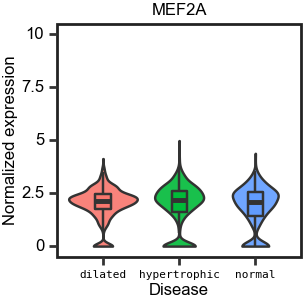

In [32]:
#boxplot LAMA2

data_rm_sparse_subset["SORBS2"]

target="MEF2A"

from plotnine import *
import pandas as pd

data=pd.DataFrame(data_rm_sparse_subset[target])

data["Disease"]=data.index

#select data by Novel type




#data['Cell type'] = pd.Categorical(data['Cell type'], categories=pd.unique(data['Cell type'])) #reorder legend

#plot
black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

p=(
    ggplot()
    
    +geom_violin(data,aes(x="Disease",y=target,fill="Disease"),alpha=0.9)
    +geom_boxplot(data,aes(x="Disease",y=target,fill="Disease"),outlier_shape="",width=0.2)   
    #+geom_jitter(data,aes(x="Disease",y="LAMA2",fill="Disease"),width=0.2, height=0, alpha=0.3,size=0.1) 
    #+geom_violin(data,aes(x="Cell type",y="Probability",fill="Novel type"))
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=4,family="Monospace",color="black",angle=0),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
            figure_size=[1.52,1.52],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.70,0.75), 
            legend_position='none',
            legend_key_size=8) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    #+ylim([0,0.20])
    #+xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +ylim([0,10])
    +scale_x_discrete(labels=["dilated","hypertrophic","normal"])
    #scale_x_discrete(limits=["dilated","hypertrophic","normal"])
    +ylab("Normalized expression")
    +ggtitle(target)

)
print(p)
#p.save('figure/heart_disease_boxplot_LAMA2.pdf')

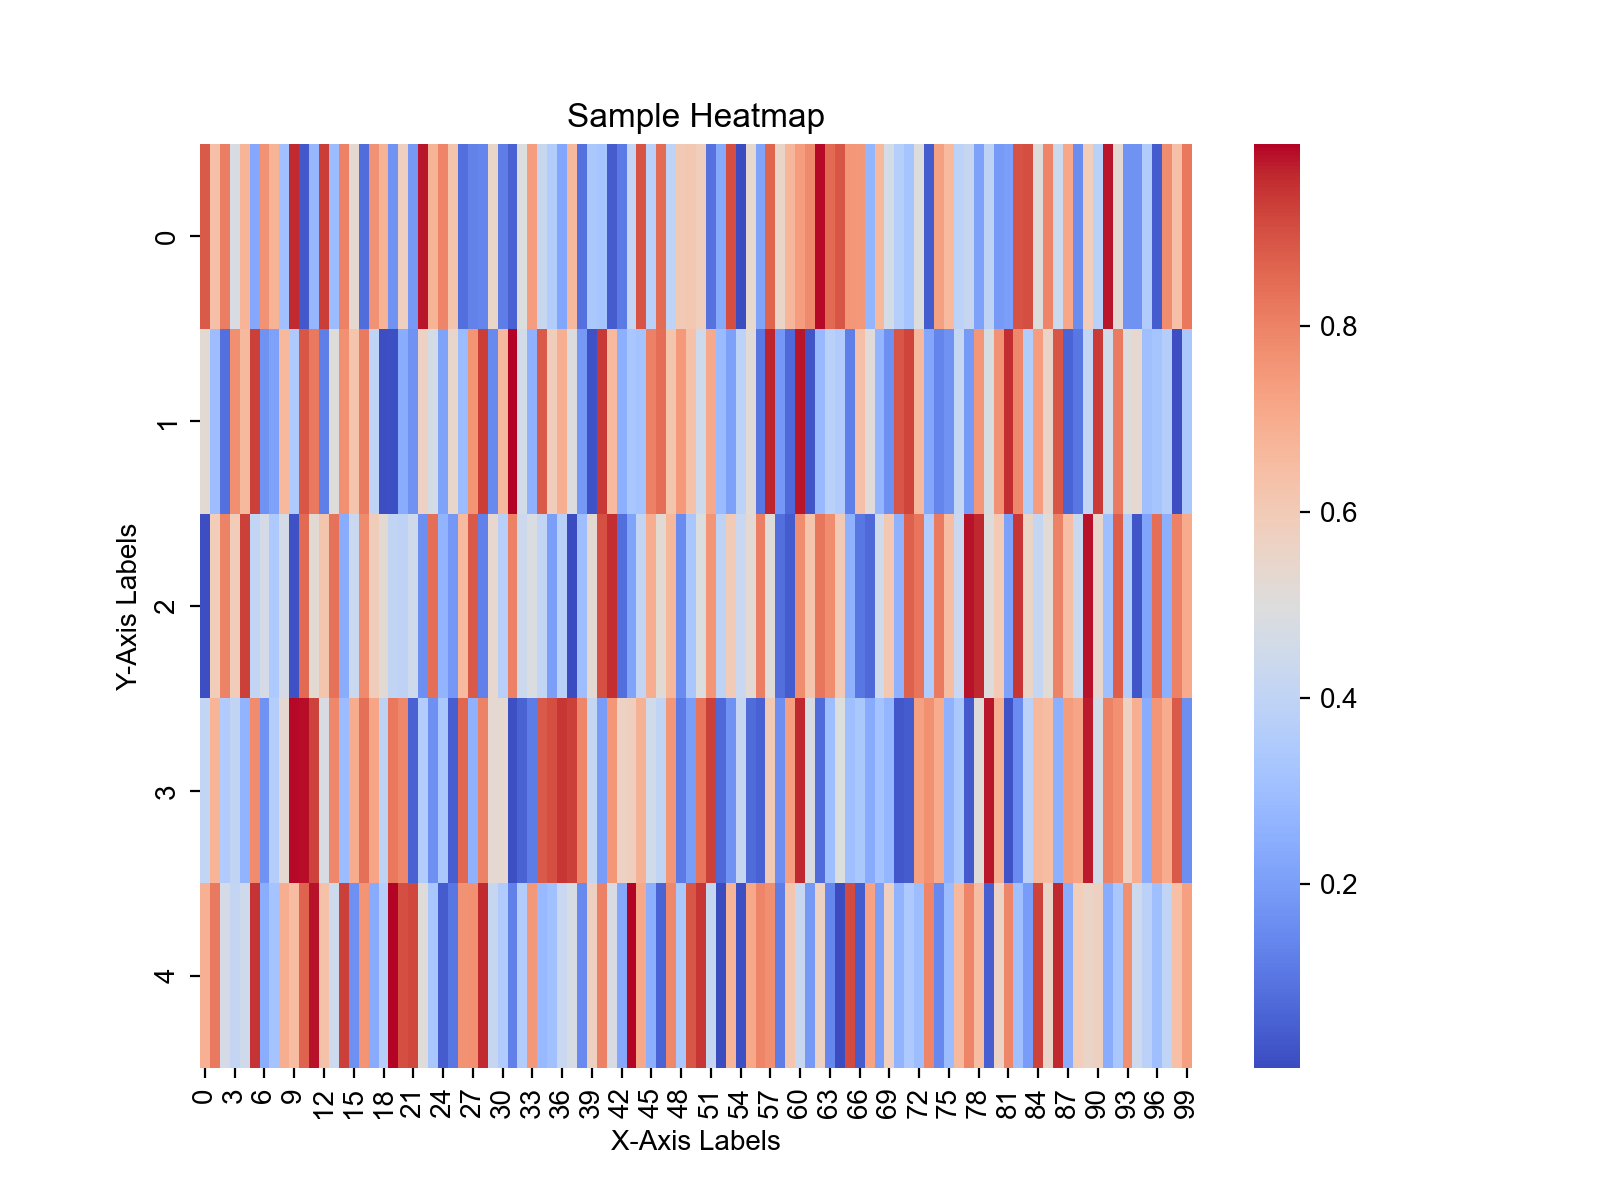

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
data = np.random.rand(5, 100)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Sample Heatmap')
plt.xlabel('X-Axis Labels')
plt.ylabel('Y-Axis Labels')
plt.show()


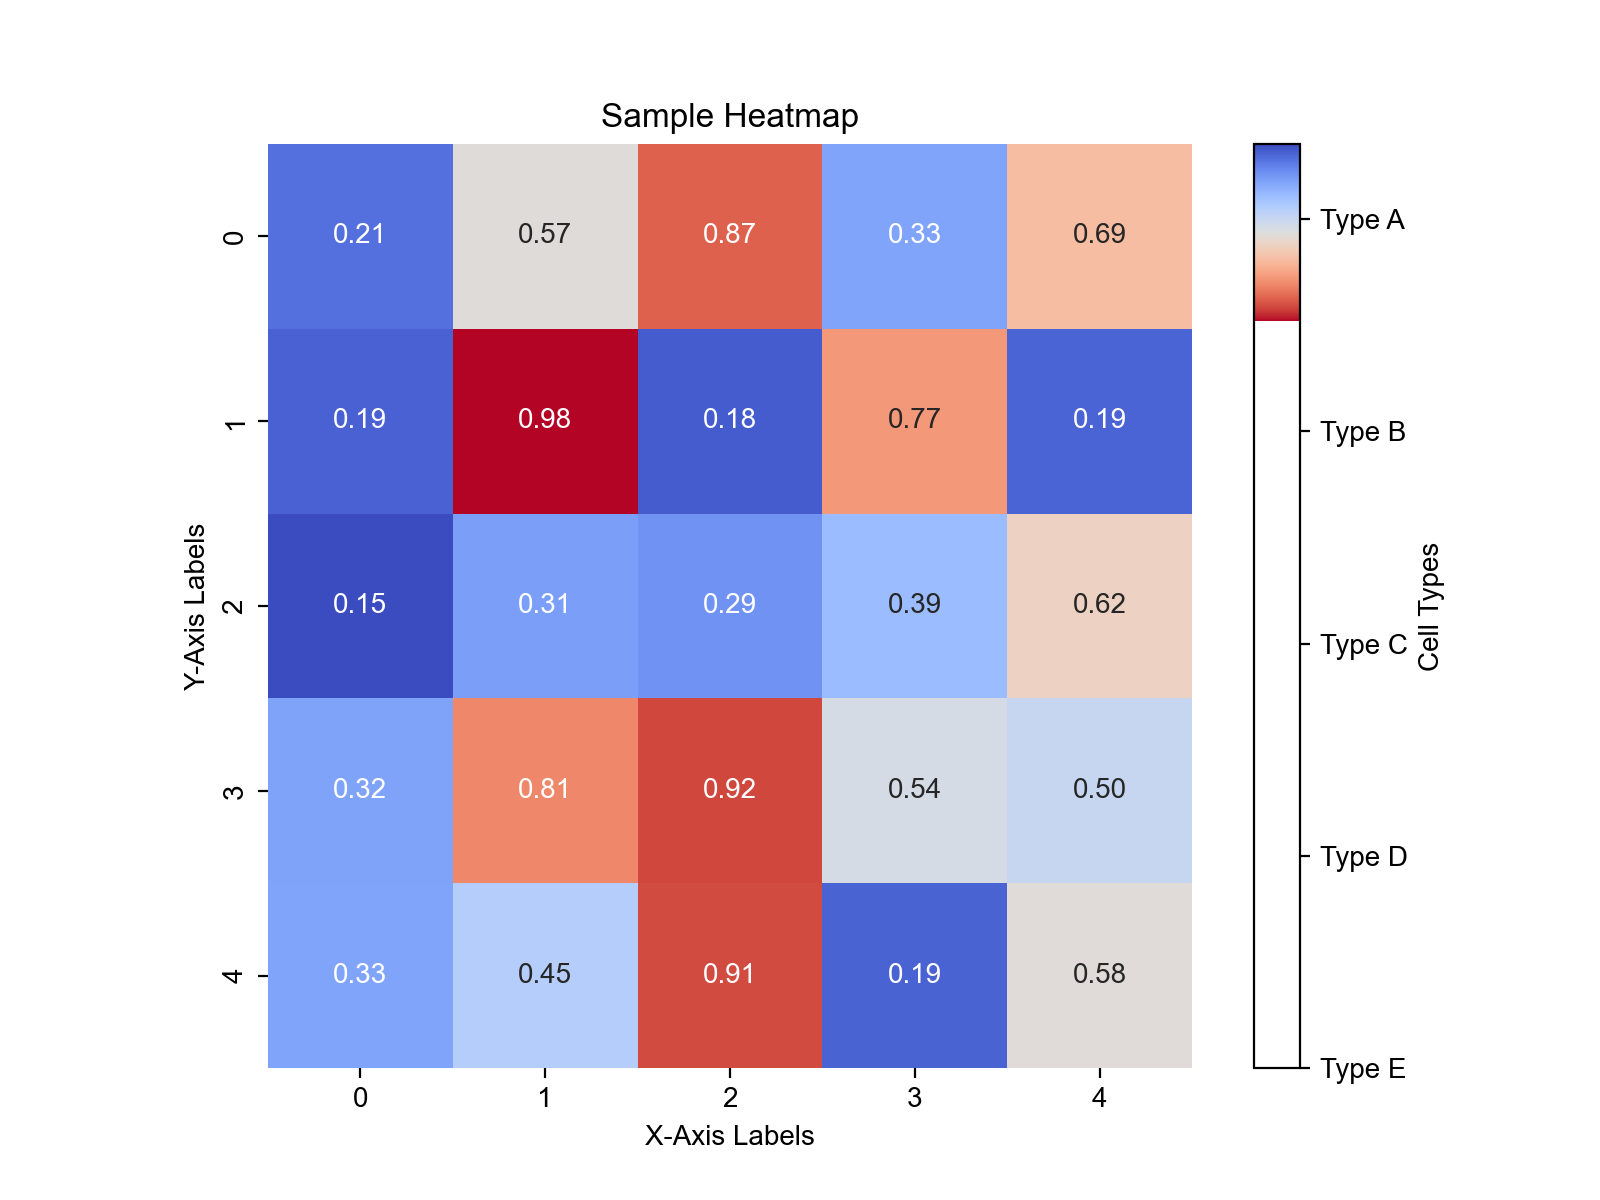

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
data = np.random.rand(5, 5)
cell_types = ["Type A", "Type B", "Type C", "Type D", "Type E"]  # Replace with your cell type labels

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Sample Heatmap')
plt.xlabel('X-Axis Labels')
plt.ylabel('Y-Axis Labels')

# Add a custom color bar for cell types
cbar = plt.colorbar(heatmap.imshow(data, cmap='coolwarm'))
cbar.set_ticks([])
cbar.set_label('Cell Types')

# Customize color bar labels
cbar.ax.invert_yaxis()
cbar.ax.set_yticks(np.arange(0.5, len(cell_types), 1))
cbar.ax.set_yticklabels(cell_types)

plt.show()

